#  Loading the data and the preprocissing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
prices_df = pd.DataFrame.from_csv('market-price.csv', header=None, index_col=None)
prices_df.columns = ['date', 'price']

prices_df.head()

,date,price
0,2016-07-13 00:00:00,657.452487
1,2016-07-14 00:00:00,658.831613
2,2016-07-15 00:00:00,664.571450
3,2016-07-16 00:00:00,662.153350
4,2016-07-17 00:00:00,675.459050


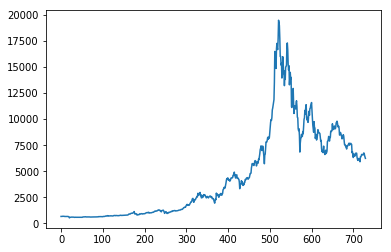

In [3]:
plt.plot(prices_df.price.values)

In [4]:
seq_length = 30

In [5]:
X = np.array(prices_df.price.values).reshape(-1, 1)

minMax = MinMaxScaler()
X = minMax.fit_transform(X)

X = X.squeeze()

In [6]:
x = []
y = []
for i in range(len(prices_df.price) - seq_length):
    x.append(X[i: i+(seq_length)-1])
    y.append(X[i+(seq_length)-1])
x = np.array(x)
y = np.array(y)

In [7]:
x_train, x_test, y_train, y_test= train_test_split(x, y)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(525, 29)
(175, 29)
(175,)
(525,)


In [8]:
x_train = x_train.reshape(-1, seq_length-1,1)
x_test = x_test.reshape(-1, seq_length-1,1)

# Model building and training

In [9]:
import keras
from keras.layers import Input, LSTM, Activation, Dense
from keras.models import Sequential, Model
from keras.callbacks import LearningRateScheduler

Using TensorFlow backend.


In [10]:
model = Sequential()

In [11]:
input = Input((seq_length-1, 1))
X = LSTM(128, recurrent_dropout= 0.5)(input)
X = Dense(1)(X)
model = Model(input, X)

In [12]:
model.compile(loss='mse', optimizer='adam')

In [13]:
def reduce(epoch, lr):
    if epoch%10 == 0:
        return lr
    return lr
scheduler = LearningRateScheduler(reduce)

In [14]:
history = model.fit(x_train, y_train, epochs=300, validation_split=0.2)

Train on 420 samples, validate on 105 samples
Epoch 1/300
420/420 [==============================] - 1s 2ms/step - loss: 0.0231 - val_loss: 0.0037
Epoch 2/300
420/420 [==============================] - 0s 1ms/step - loss: 0.0041 - val_loss: 0.0021
Epoch 3/300
420/420 [==============================] - 1s 1ms/step - loss: 0.0024 - val_loss: 0.0022
Epoch 4/300
420/420 [==============================] - 1s 2ms/step - loss: 0.0024 - val_loss: 0.0023
Epoch 5/300
420/420 [==============================] - 1s 2ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 6/300
420/420 [==============================] - 1s 1ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 7/300
420/420 [==============================] - 1s 1ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/300
420/420 [==============================] - 1s 1ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/300
420/420 [==============================] - 1s 1ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 10/300
420/420 [=======================

420/420 [==============================] - 0s 896us/step - loss: 6.4864e-04 - val_loss: 7.4862e-04
Epoch 152/300
420/420 [==============================] - 0s 885us/step - loss: 6.1981e-04 - val_loss: 7.4359e-04
Epoch 153/300
420/420 [==============================] - 0s 882us/step - loss: 5.8925e-04 - val_loss: 7.4151e-04
Epoch 154/300
420/420 [==============================] - 0s 890us/step - loss: 9.1350e-04 - val_loss: 9.0571e-04
Epoch 155/300
420/420 [==============================] - 0s 871us/step - loss: 6.1338e-04 - val_loss: 8.3883e-04
Epoch 156/300
420/420 [==============================] - 0s 916us/step - loss: 7.6323e-04 - val_loss: 7.4607e-04
Epoch 157/300
420/420 [==============================] - 0s 906us/step - loss: 6.6050e-04 - val_loss: 7.7208e-04
Epoch 158/300
420/420 [==============================] - 0s 895us/step - loss: 6.2428e-04 - val_loss: 9.0597e-04
Epoch 159/300
420/420 [==============================] - 0s 897us/step - loss: 5.5583e-04 - val_loss: 9.1359e-

Epoch 225/300
420/420 [==============================] - 0s 1ms/step - loss: 6.7938e-04 - val_loss: 7.5736e-04
Epoch 226/300
420/420 [==============================] - 1s 2ms/step - loss: 6.1126e-04 - val_loss: 6.8585e-04
Epoch 227/300
420/420 [==============================] - 0s 1ms/step - loss: 6.1595e-04 - val_loss: 8.5961e-04
Epoch 228/300
420/420 [==============================] - 1s 1ms/step - loss: 6.1978e-04 - val_loss: 7.0605e-04
Epoch 229/300
420/420 [==============================] - 0s 1ms/step - loss: 5.3860e-04 - val_loss: 8.1123e-04
Epoch 230/300
420/420 [==============================] - 0s 1ms/step - loss: 5.3871e-04 - val_loss: 7.4924e-04
Epoch 231/300
420/420 [==============================] - 0s 1ms/step - loss: 5.6144e-04 - val_loss: 6.8510e-04
Epoch 232/300
420/420 [==============================] - 0s 1ms/step - loss: 5.2245e-04 - val_loss: 7.1467e-04
Epoch 233/300
420/420 [==============================] - 0s 1ms/step - loss: 7.3086e-04 - val_loss: 7.7201e-04
E

Epoch 299/300
420/420 [==============================] - 1s 1ms/step - loss: 4.9791e-04 - val_loss: 6.6772e-04
Epoch 300/300
420/420 [==============================] - 0s 1ms/step - loss: 5.7175e-04 - val_loss: 6.5599e-04


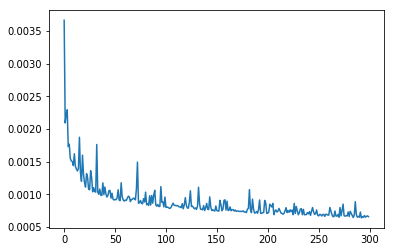

In [15]:
plt.plot(list(history.history['val_loss']))

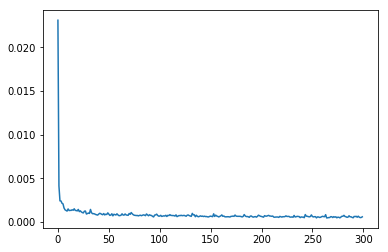

In [16]:
plt.plot(list(history.history['loss']))

# Testing

In [17]:
predictions = model.predict(x_test)

pred = minMax.inverse_transform(predictions)

pred = pred.squeeze()

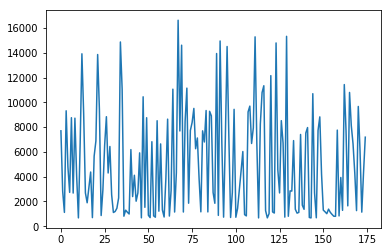

In [18]:
plt.plot(pred)

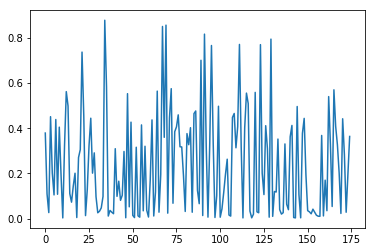

In [19]:
plt.plot(y_test)

#### test loss using mean absolute error

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
mean_absolute_error(y_test, pred)

5109.9619915911744

#### ploting subset from the data

In [22]:
p = model.predict(x[:100].reshape(-1, seq_length-1, 1))
p = minMax.inverse_transform(p)
p = p.squeeze()

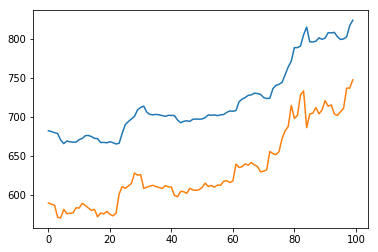

In [23]:
plt.plot(p)
plt.plot(minMax.inverse_transform(y[:100].reshape(-1,1)).squeeze())

#### ploting data of the past 2 years

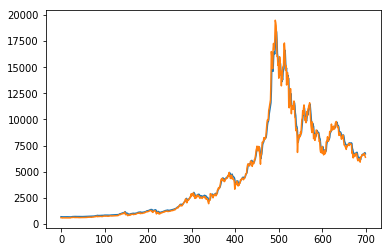

In [24]:
p = model.predict(x.reshape(-1, seq_length-1, 1))
p = minMax.inverse_transform(p)
p = p.squeeze()
plt.plot(p)
plt.plot(minMax.inverse_transform(y.reshape(-1,1)).squeeze())

In [25]:
model.save("model.h5")